# Getting to know and implementing the dropout layer and solving the deep learning overfitting problem

In [1]:
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

# Preprocessing

In [6]:
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255


In [7]:
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# model Definition

In [9]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation='softmax'))


c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
import tensorflow as tf

model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,810 (971.91 KB)

 Trainable params: 248,810 (971.91 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
hist = model.fit(x_train,y_train,epochs=10,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9841 - loss: 0.0563 - val_accuracy: 0.9900 - val_loss: 0.0317
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9858 - loss: 0.0512 - val_accuracy: 0.9920 - val_loss: 0.0272
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9867 - loss: 0.0463 - val_accuracy: 0.9891 - val_loss: 0.0344
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9884 - loss: 0.0419 - val_accuracy: 0.9910 - val_loss: 0.0292
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9894 - loss: 0.0361 - val_accuracy: 0.9910 - val_loss: 0.0287
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9906 - loss: 0.0344 - val_accuracy: 0.9917 - val_loss: 0.0262
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9908 - loss: 0.0303 - val_accuracy: 0.9926 - val_loss: 0.0246
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9918 - loss: 0.0281 - val_accu

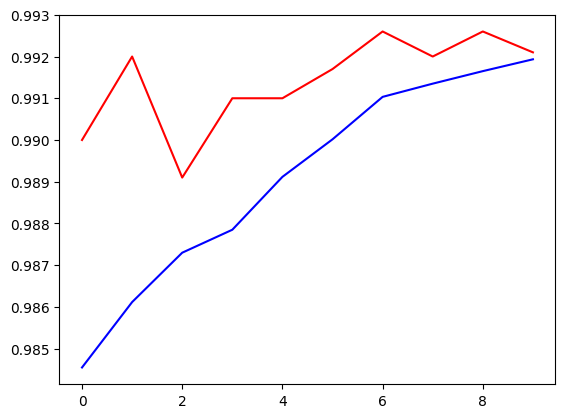

In [17]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],color='blue')
plt.plot(hist.history['val_accuracy'],color='red')